In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from ipywidgets import interactive
import numpy as np

import sys 
sys.path.append('../../utils/')
from opti_graphs import *
plt.style.use('ggplot')

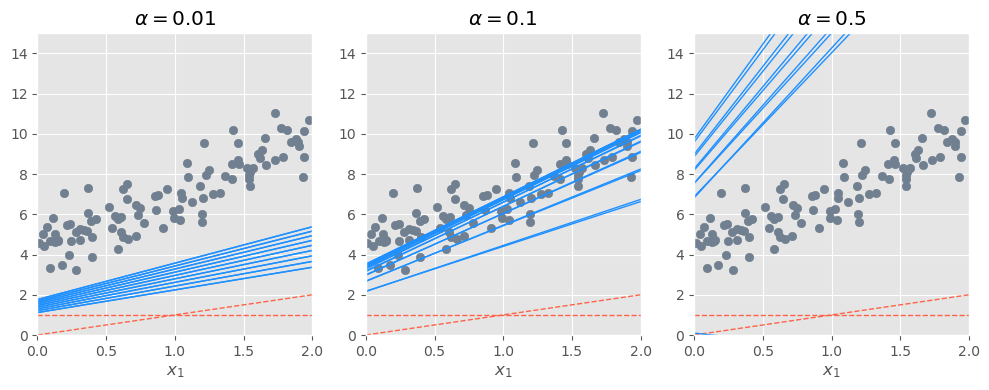

In [21]:
# Generamos un conjunto de datos artificial
X, y = artificial_points()
plt.figure(figsize=(10, 4))
# compararemos el efecto del descenso de gradiente batch en tres niveles
for i, n in enumerate([0.01,0.1, 0.5]):
    plt.subplot(1, 3, i + 1)
    batch_gd_plot(X, y, theta=1, alpha=n)
    plt.tight_layout()

In [3]:
help(global_surface)

Help on function global_surface in module opti_graphs:

global_surface(L=0.1, n=400)
    TODO: Docstring for global_surface.
    :returns: TODO



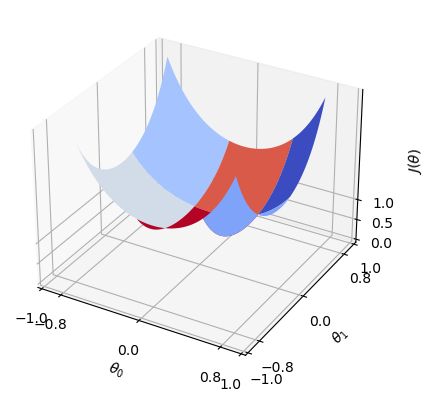

In [4]:
plt.style.use('default'); 
global_surface(L=0.8, n = 100)

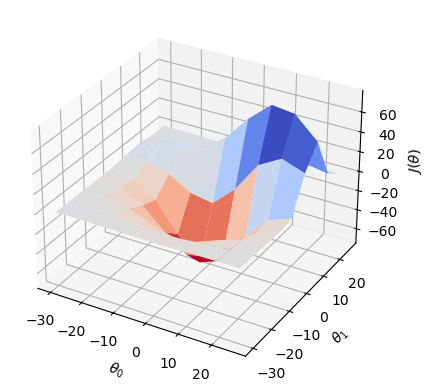

In [5]:
plt.style.use('default'); 
max_min_surface()

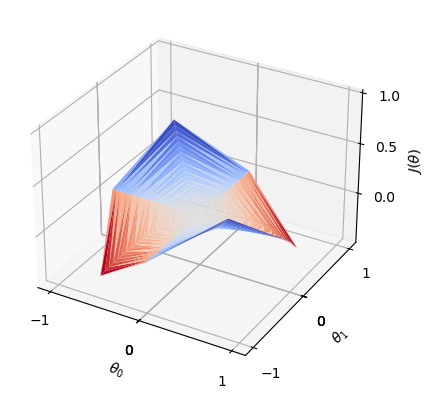

In [6]:
plt.style.use('default');
saddle_surface()

In [7]:
interactive(gradient_1d, alpha = (1,6))

interactive(children=(IntSlider(value=1, description='alpha', max=6, min=1), Output()), _dom_classes=('widget-…

In [8]:
interactive(gradient_2d, alpha = (0.10,.3))

interactive(children=(FloatSlider(value=0.3, description='alpha', max=0.3, min=0.1), Output()), _dom_classes=(…

In [9]:
# generamos los imports básicos de Keras
from keras import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import LambdaCallback
from keras.optimizers import SGD
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.make_classification(n_samples = 500)
# generamos la división en conjuntos de entrenamiento/validación
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [10]:
sgd = SGD(lr=0.01, # Tasa de aprendizaje
          momentum=0, #Obviamos momento
          decay=0, # obviamos decaimiento de los pesos
          nesterov=False) #Obviamos momento de nesterov

In [11]:
model = Sequential()
model.add(Dense(20, # agregamos una capa densa con 20 neuronas
                input_dim=20, # 20 atributos de entrada
                activation='softmax')) # y una activación softmax

model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd)

In [22]:
weights = []

print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs: weights.append(model.layers[0].get_weights()))


model.fit(X_train, y_train, # conjunto de entrenamiento
          batch_size=X_train.shape[0], # definimos la cantidad de datos a ingresar
          epochs=1000, # la cantidad de iteraciones de entrenamiento.
          verbose=1, # no deseamos implementar un reporte insitu
          validation_data=(X_test, y_test),
          # incluimos nuestro callback
          callbacks=[print_weights])

# extraemos los coeficientes
w_all_data = [item[0] for item in [item[0] for item in [item[0] for item in weights]]]

Epoch 1/1000
1/1 [==============================] - 0s 141ms/step - loss: 0.2680 - val_loss: 0.3277
Epoch 2/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.2680 - val_loss: 0.3277
Epoch 3/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.2680 - val_loss: 0.3278
Epoch 4/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.2680 - val_loss: 0.3278
Epoch 5/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.2680 - val_loss: 0.3278
Epoch 6/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.2680 - val_loss: 0.3278
Epoch 7/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.2680 - val_loss: 0.3278
Epoch 8/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.2680 - val_loss: 0.3278
Epoch 9/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.2679 - val_loss: 0.3278
Epoch 10/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.2679 - val_loss: 0.3278
Epoch 11

Epoch 83/1000
1/1 [==============================] - 0s 123ms/step - loss: 0.2672 - val_loss: 0.3281
Epoch 84/1000
1/1 [==============================] - 0s 88ms/step - loss: 0.2672 - val_loss: 0.3282
Epoch 85/1000
1/1 [==============================] - 0s 115ms/step - loss: 0.2672 - val_loss: 0.3282
Epoch 86/1000
1/1 [==============================] - 0s 114ms/step - loss: 0.2672 - val_loss: 0.3282
Epoch 87/1000
1/1 [==============================] - 0s 116ms/step - loss: 0.2672 - val_loss: 0.3282
Epoch 88/1000
1/1 [==============================] - 0s 71ms/step - loss: 0.2672 - val_loss: 0.3282
Epoch 89/1000
1/1 [==============================] - 0s 90ms/step - loss: 0.2672 - val_loss: 0.3282
Epoch 90/1000
1/1 [==============================] - 0s 87ms/step - loss: 0.2672 - val_loss: 0.3282
Epoch 91/1000
1/1 [==============================] - 0s 96ms/step - loss: 0.2672 - val_loss: 0.3282
Epoch 92/1000
1/1 [==============================] - 0s 108ms/step - loss: 0.2672 - val_loss: 0.

Epoch 164/1000
1/1 [==============================] - 0s 110ms/step - loss: 0.2668 - val_loss: 0.3285
Epoch 165/1000
1/1 [==============================] - 0s 135ms/step - loss: 0.2668 - val_loss: 0.3285
Epoch 166/1000
1/1 [==============================] - 0s 108ms/step - loss: 0.2668 - val_loss: 0.3285
Epoch 167/1000
1/1 [==============================] - 0s 88ms/step - loss: 0.2668 - val_loss: 0.3285
Epoch 168/1000
1/1 [==============================] - 0s 109ms/step - loss: 0.2668 - val_loss: 0.3285
Epoch 169/1000
1/1 [==============================] - 0s 130ms/step - loss: 0.2668 - val_loss: 0.3285
Epoch 170/1000
1/1 [==============================] - 0s 101ms/step - loss: 0.2668 - val_loss: 0.3286
Epoch 171/1000
1/1 [==============================] - 0s 106ms/step - loss: 0.2668 - val_loss: 0.3286
Epoch 172/1000
1/1 [==============================] - 0s 89ms/step - loss: 0.2668 - val_loss: 0.3286
Epoch 173/1000
1/1 [==============================] - 0s 154ms/step - loss: 0.2667 -

1/1 [==============================] - 0s 33ms/step - loss: 0.2665 - val_loss: 0.3288
Epoch 245/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.2665 - val_loss: 0.3288
Epoch 246/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.2665 - val_loss: 0.3288
Epoch 247/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.2665 - val_loss: 0.3288
Epoch 248/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.2665 - val_loss: 0.3288
Epoch 249/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.2665 - val_loss: 0.3288
Epoch 250/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.2665 - val_loss: 0.3288
Epoch 251/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.2665 - val_loss: 0.3288
Epoch 252/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.2665 - val_loss: 0.3289
Epoch 253/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.2665 - val_loss: 0.3289
Epoch

1/1 [==============================] - 0s 87ms/step - loss: 0.2664 - val_loss: 0.3291
Epoch 326/1000
1/1 [==============================] - 0s 93ms/step - loss: 0.2664 - val_loss: 0.3291
Epoch 327/1000
1/1 [==============================] - 0s 73ms/step - loss: 0.2664 - val_loss: 0.3291
Epoch 328/1000
1/1 [==============================] - 0s 77ms/step - loss: 0.2664 - val_loss: 0.3291
Epoch 329/1000
1/1 [==============================] - 0s 74ms/step - loss: 0.2664 - val_loss: 0.3291
Epoch 330/1000
1/1 [==============================] - 0s 85ms/step - loss: 0.2664 - val_loss: 0.3291
Epoch 331/1000
1/1 [==============================] - 0s 77ms/step - loss: 0.2664 - val_loss: 0.3291
Epoch 332/1000
1/1 [==============================] - 0s 72ms/step - loss: 0.2664 - val_loss: 0.3291
Epoch 333/1000
1/1 [==============================] - 0s 76ms/step - loss: 0.2664 - val_loss: 0.3291
Epoch 334/1000
1/1 [==============================] - 0s 80ms/step - loss: 0.2664 - val_loss: 0.3291
Epoch

1/1 [==============================] - 0s 77ms/step - loss: 0.2663 - val_loss: 0.3292
Epoch 407/1000
1/1 [==============================] - 0s 87ms/step - loss: 0.2663 - val_loss: 0.3292
Epoch 408/1000
1/1 [==============================] - 0s 71ms/step - loss: 0.2663 - val_loss: 0.3292
Epoch 409/1000
1/1 [==============================] - 0s 73ms/step - loss: 0.2663 - val_loss: 0.3292
Epoch 410/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.2663 - val_loss: 0.3292
Epoch 411/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.2663 - val_loss: 0.3292
Epoch 412/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.2663 - val_loss: 0.3292
Epoch 413/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.2663 - val_loss: 0.3292
Epoch 414/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.2663 - val_loss: 0.3292
Epoch 415/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.2663 - val_loss: 0.3292
Epoch

1/1 [==============================] - 0s 63ms/step - loss: 0.2663 - val_loss: 0.3293
Epoch 488/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.2663 - val_loss: 0.3293
Epoch 489/1000
1/1 [==============================] - 0s 78ms/step - loss: 0.2663 - val_loss: 0.3293
Epoch 490/1000
1/1 [==============================] - 0s 76ms/step - loss: 0.2663 - val_loss: 0.3293
Epoch 491/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.2663 - val_loss: 0.3293
Epoch 492/1000
1/1 [==============================] - 0s 88ms/step - loss: 0.2663 - val_loss: 0.3293
Epoch 493/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.2663 - val_loss: 0.3293
Epoch 494/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.2663 - val_loss: 0.3293
Epoch 495/1000
1/1 [==============================] - 0s 72ms/step - loss: 0.2663 - val_loss: 0.3293
Epoch 496/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.2663 - val_loss: 0.3293
Epoch

1/1 [==============================] - 0s 64ms/step - loss: 0.2663 - val_loss: 0.3294
Epoch 569/1000
1/1 [==============================] - 0s 91ms/step - loss: 0.2663 - val_loss: 0.3294
Epoch 570/1000
1/1 [==============================] - 0s 76ms/step - loss: 0.2663 - val_loss: 0.3294
Epoch 571/1000
1/1 [==============================] - 0s 84ms/step - loss: 0.2663 - val_loss: 0.3294
Epoch 572/1000
1/1 [==============================] - 0s 78ms/step - loss: 0.2663 - val_loss: 0.3294
Epoch 573/1000
1/1 [==============================] - 0s 81ms/step - loss: 0.2663 - val_loss: 0.3294
Epoch 574/1000
1/1 [==============================] - 0s 80ms/step - loss: 0.2663 - val_loss: 0.3294
Epoch 575/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.2663 - val_loss: 0.3294
Epoch 576/1000
1/1 [==============================] - 0s 76ms/step - loss: 0.2663 - val_loss: 0.3294
Epoch 577/1000
1/1 [==============================] - 0s 87ms/step - loss: 0.2663 - val_loss: 0.3294
Epoch

1/1 [==============================] - 0s 43ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 650/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 651/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 652/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 653/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 654/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 655/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 656/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 657/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 658/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch

1/1 [==============================] - 0s 91ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 731/1000
1/1 [==============================] - 0s 87ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 732/1000
1/1 [==============================] - 0s 90ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 733/1000
1/1 [==============================] - 0s 81ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 734/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 735/1000
1/1 [==============================] - 0s 78ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 736/1000
1/1 [==============================] - 0s 75ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 737/1000
1/1 [==============================] - 0s 99ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 738/1000
1/1 [==============================] - 0s 80ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch 739/1000
1/1 [==============================] - 0s 88ms/step - loss: 0.2662 - val_loss: 0.3294
Epoch

1/1 [==============================] - 0s 72ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 812/1000
1/1 [==============================] - 0s 85ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 813/1000
1/1 [==============================] - 0s 77ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 814/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 815/1000
1/1 [==============================] - 0s 92ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 816/1000
1/1 [==============================] - 0s 72ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 817/1000
1/1 [==============================] - 0s 80ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 818/1000
1/1 [==============================] - 0s 83ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 819/1000
1/1 [==============================] - 0s 94ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 820/1000
1/1 [==============================] - 0s 85ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch

1/1 [==============================] - 0s 35ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 893/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 894/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 895/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 896/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 897/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 898/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 899/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 900/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 901/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch

1/1 [==============================] - 0s 98ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 974/1000
1/1 [==============================] - 0s 80ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 975/1000
1/1 [==============================] - 0s 83ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 976/1000
1/1 [==============================] - 0s 79ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 977/1000
1/1 [==============================] - 0s 80ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 978/1000
1/1 [==============================] - 0s 83ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 979/1000
1/1 [==============================] - 0s 77ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 980/1000
1/1 [==============================] - 0s 89ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 981/1000
1/1 [==============================] - 0s 73ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch 982/1000
1/1 [==============================] - 0s 77ms/step - loss: 0.2662 - val_loss: 0.3295
Epoch

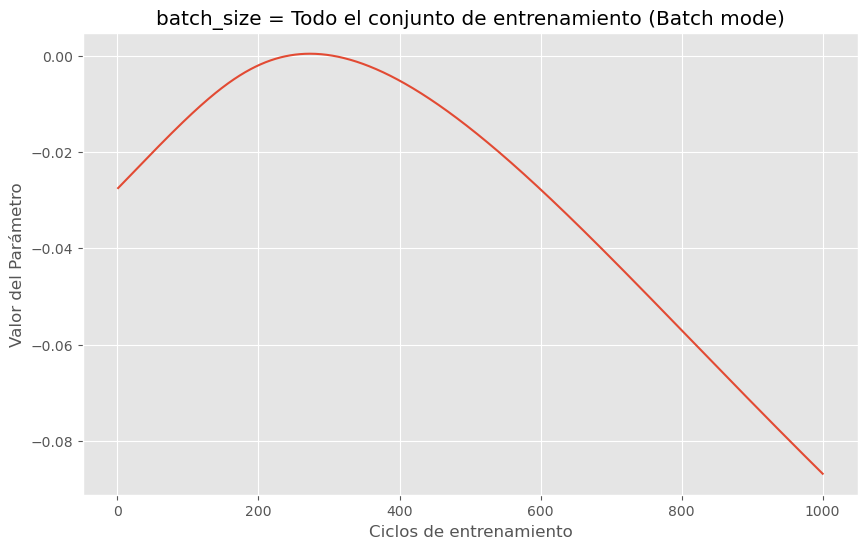

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(1, 1000, 1000), w_all_data)
plt.xlabel('Ciclos de entrenamiento');
plt.ylabel('Valor del Parámetro');
plt.title('batch_size = Todo el conjunto de entrenamiento (Batch mode)');

In [14]:
## MINI BATCH

In [15]:
weights = []
print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs:
weights.append(model.layers[0].get_weights()))
model.fit(X_train, y_train,
batch_size=64, # fijamos la cantidad de datos en cada batch
epochs=1000, #aumentamos la cantidad de ciclos de entrenamiento.
verbose=0,
validation_data=(X_test, y_test), callbacks=[print_weights])
w_all_data = [item[0] for item in [item[0] for item in [item[0] for item in weights]]]

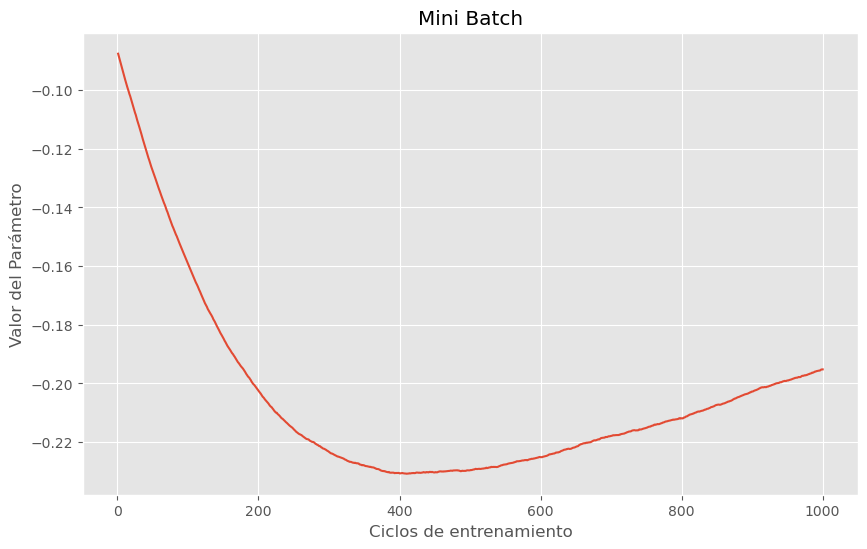

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(1, 1000, 1000), w_all_data)
plt.xlabel('Ciclos de entrenamiento')
plt.ylabel('Valor del Parámetro')
plt.title('Mini Batch');

In [17]:
weights = []
print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs:
weights.append(model.layers[0].get_weights()))
model.fit(X_train, y_train,
batch_size=1, # fijamos la cantidad de datos a entrenar.
epochs=1000, # mantenemos la cantidad de épocas a entrenar en 1000.
verbose=0,
validation_data=(X_test, y_test),
callbacks=[print_weights])
w_all_data = [item[0] for item in [item[0] for item in [item[0] for item in weights]]]

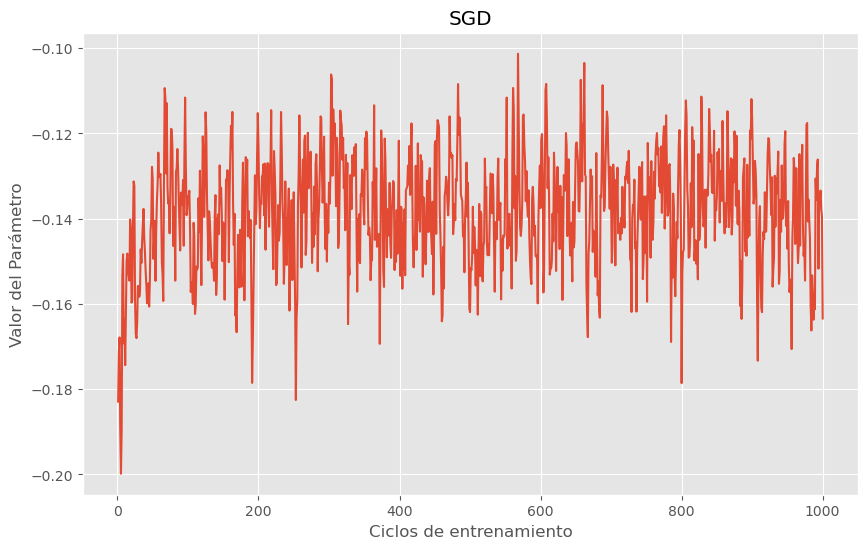

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(1, 1000, 1000), w_all_data)
plt.xlabel('Ciclos de entrenamiento')
plt.ylabel('Valor del Parámetro')
plt.title('SGD');

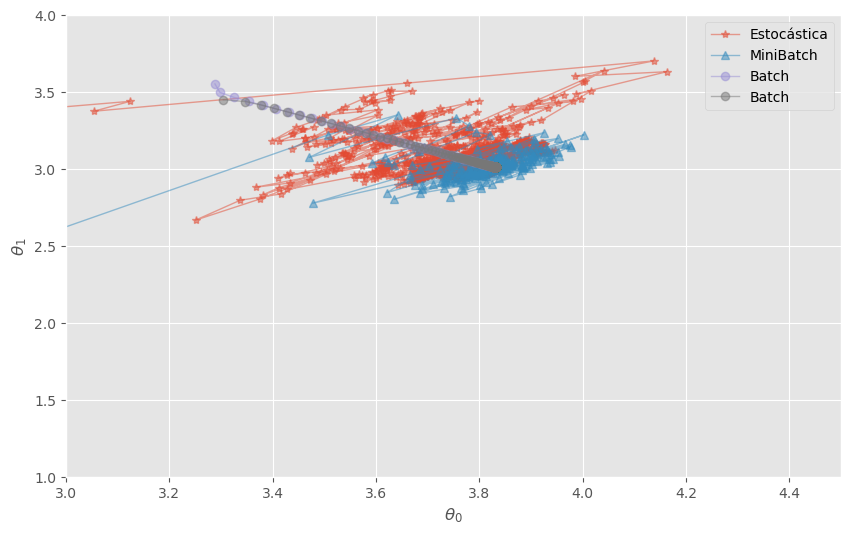

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
X, y = artificial_points()
batch_gd = batch_gd_plot(X, y, theta=1, alpha=.2, theta_path=True)
stochastic_gd = stochastic_gd_plot(X, y, theta_path=True)
minibatch_gd = mini_batch_gd_plot(X, y, theta=1, alpha=.2,
theta_path=True)
compare_gd_strategies(batch_gd, stochastic_gd, minibatch_gd)